# Convolutional Neural Network (CNN)

In [1]:
# loading libraries
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, Conv2D, MaxPooling2D
import matplotlib as mpl
import seaborn as sns
np.random.seed(1367)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
sns.set_style("ticks", {"xtick.direction": u"in", "ytick.direction": u"in"})
mpl.rcParams["axes.linewidth"] = 2 
mpl.rcParams["lines.linewidth"] = 3

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
_, img_rows, img_cols =  X_train.shape
NUM_CLASSES = len(np.unique(y_train))
NUM_INPUT_NODES = img_rows * img_cols
print(F"Number of training samples: {X_train.shape[0]}")
print(F"Number of test samples: {X_test.shape[0]}")
print(F"Image rows: {X_train.shape[1]}")
print(F"Image columns: {X_train.shape[2]}")
print(F"Number of classes: {NUM_CLASSES}")

Number of training samples: 60000
Number of test samples: 10000
Image rows: 28
Image columns: 28
Number of classes: 10


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
#reshaping
#this assumes our data format
#For 3D data, "channels_last" assumes (conv_dim1, conv_dim2, conv_dim3, channels) while 
#"channels_first" assumes (channels, conv_dim1, conv_dim2, conv_dim3).
if tf.keras.backend.image_data_format() == "channels_first":
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
#more reshaping
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255
print("X_train shape:", X_train.shape) #X_train shape: (60000, 28, 28, 1)

X_train shape: (60000, 28, 28, 1)


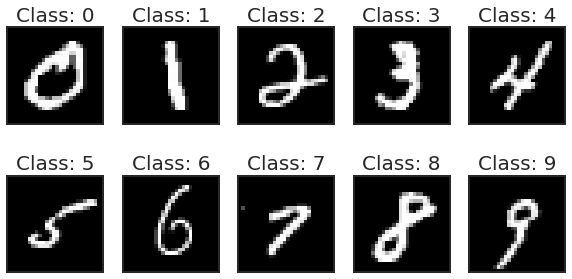

In [5]:
SAVE_FIG = True
fig = plt.figure(figsize=(10,5))
for i in range(NUM_CLASSES):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = X_train[y_train[:]==i,:]
    ax.set_title("Class: " + str(i) , fontsize = 20)
    plt.imshow(idx[1], cmap="gray")

if SAVE_FIG:
    plt.savefig("../assets/header.png" , bbox_inches="tight")
plt.show()

In [6]:
def cnn():
    """
    Define a cnn model structure
    """
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation="relu",
                     input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(NUM_CLASSES, activation="softmax"))

    return model


In [7]:
def plot_results(results):
    """
    Plot accuracy/loss through epochs
    """
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    # summarize history for accuracy
    axs[0].plot(
        range(1, len(results.history["accuracy"]) + 1),
        results.history["accuracy"],
        color="navy",
        ls="--",
        label="Training",
    )
    axs[0].plot(
        range(1, len(results.history["val_accuracy"]) + 1),
        results.history["val_accuracy"],
        color="cyan",
        ls="--",
        label="Validation",
    )

    axs[0].set_ylabel("Accuracy", fontsize=15)
    axs[0].set_xlabel("Epoch", fontsize=15)
    axs[0].legend(prop={"size": 13}, loc=0, framealpha=0.0)

    # summarize history for loss
    axs[1].plot(
        range(1, len(results.history["loss"]) + 1),
        results.history["loss"],
        color="navy",
        ls="--",
        label="Training",
    )
    axs[1].plot(
        range(1, len(results.history["val_loss"]) + 1),
        results.history["val_loss"],
        color="cyan",
        ls="--",
        label="Validation",
    )

    axs[1].set_ylabel("Loss", fontsize=15)
    axs[1].set_xlabel("Epoch", fontsize=15)
    axs[1].legend(prop={"size": 13}, loc=0, framealpha=0.0)
    
    plt.savefig("../assets/performance_cnn.png" , bbox_inches="tight")
    plt.show()


In [8]:
def accuracy(results, X_test, y_test):
    """
    Accuracy metric
    """
    y_pred_proba = results.model.predict(X_test)
    y_pred = np.argmax(y_pred_proba, axis=1)
    num_correct = np.sum(y_pred == y_test)
    accuracy = float(num_correct) / y_pred_proba.shape[0]
    
    return accuracy * 100

## Training

In [9]:
# define model
model = cnn()

# compile
model.compile(optimizer=tf.keras.optimizers.Adam(0.0005),
              loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"])

start = time.time()

# fit
results = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=25,
                    verbose=1,
                    validation_data=(X_test , y_test))

end = time.time()
time_elapsed = end - start

Epoch 1/25
1875/1875 [==============================] - 100s 53ms/step - loss: 0.4231 - accuracy: 0.8676 - val_loss: 0.0522 - val_accuracy: 0.9827
Epoch 2/25
1875/1875 [==============================] - 103s 55ms/step - loss: 0.0870 - accuracy: 0.9746 - val_loss: 0.0418 - val_accuracy: 0.9860
Epoch 3/25
1875/1875 [==============================] - 103s 55ms/step - loss: 0.0628 - accuracy: 0.9799 - val_loss: 0.0367 - val_accuracy: 0.9871
Epoch 4/25
1875/1875 [==============================] - 103s 55ms/step - loss: 0.0492 - accuracy: 0.9851 - val_loss: 0.0409 - val_accuracy: 0.9886
Epoch 5/25
1875/1875 [==============================] - 103s 55ms/step - loss: 0.0398 - accuracy: 0.9883 - val_loss: 0.0284 - val_accuracy: 0.9914
Epoch 6/25
1875/1875 [==============================] - 103s 55ms/step - loss: 0.0364 - accuracy: 0.9882 - val_loss: 0.0288 - val_accuracy: 0.9918
Epoch 7/25
1875/1875 [==============================] - 103s 55ms/step - loss: 0.0314 - accuracy: 0.9904 - val_loss: 0

In [10]:
results.model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

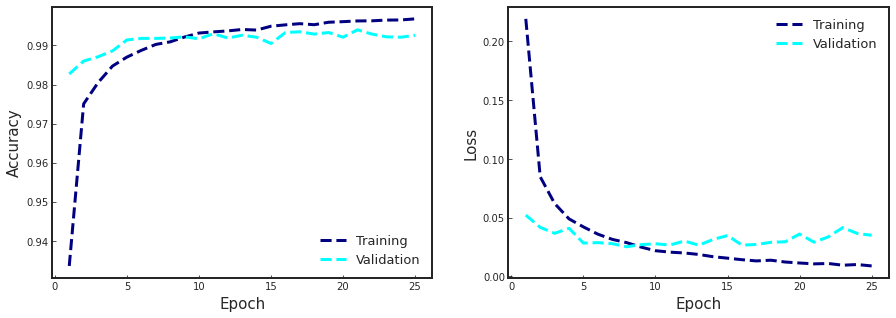

Model took 2573.433 seconds to train
Accuracy on test data is: 99.26%


In [11]:
# plot model history
plot_results(results)

print(F"Model took {time_elapsed:.3f} seconds to train")

# compute test accuracy
print(F"Accuracy on test data is: {accuracy(results, X_test, y_test):.2f}%")

In [12]:
# saving model
results.model.save("../assets/model_cnn.h5")

In [13]:
m = tf.keras.models.load_model("../assets/model_cnn.h5")

In [14]:
m.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0